# Regresión Arboles de Decisión 
_Andrés G. López A. Análisis de Datos 202016908 Grupo 64_

## Análisis Exploratorio de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file = 'Titanic-Dataset.csv'
data = pd.read_csv(file)

In [2]:
# Mostrar las primeras filas del dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Resumen estadístico de las variables
print(data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:

# Información sobre el dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


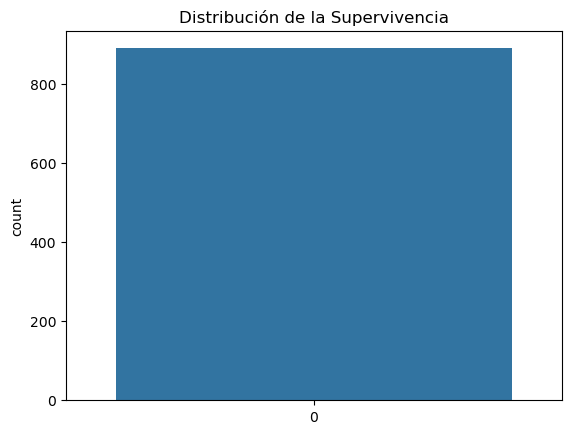

In [5]:

# Distribución de la variable objetivo (Survived)
sns.countplot(data['Survived'])
plt.title('Distribución de la Supervivencia')
plt.show()


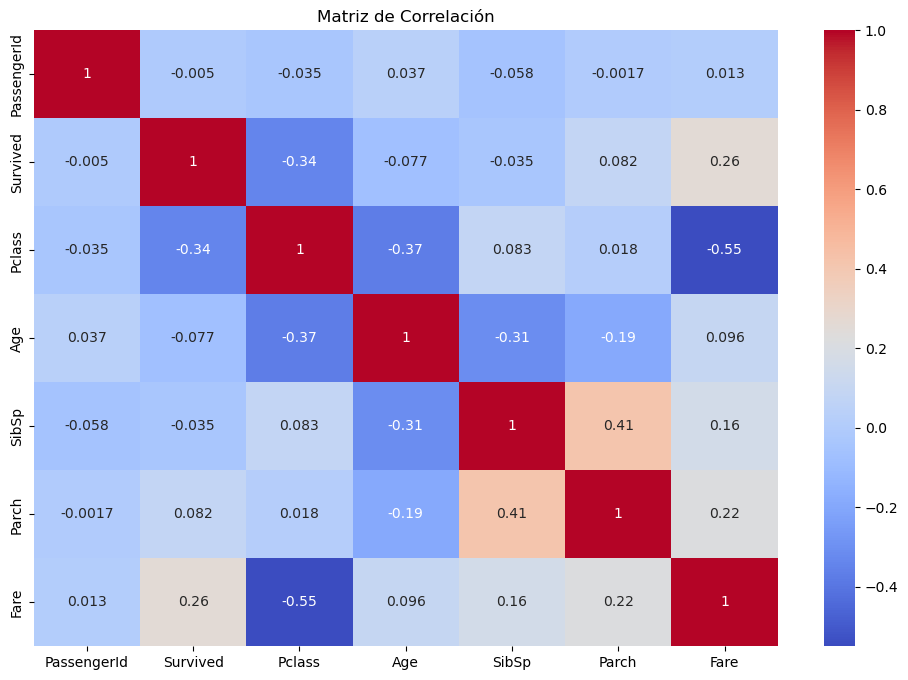

In [6]:
# Matriz de correlación
corr_matrix = data.corr(numeric_only=True)  # Seleccionar solo columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Preprocesamiento de los Datos

In [7]:
# Verificar valores faltantes
print(data.isnull().sum())

# Llenar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Convertir columnas categóricas en variables dummy
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Eliminar columnas no necesarias
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Selección de las Características Más Relevantes

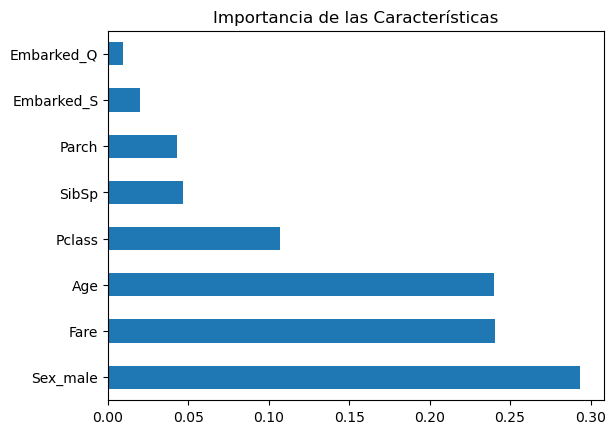

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

X = data.drop('Survived', axis=1)
y = data['Survived']

# Modelo para calcular la importancia de las características
model = ExtraTreesClassifier()
model.fit(X, y)

# Importancia de las características
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()

## Dividir el Dataset en Train y Test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el Modelo Configurando los Diferentes Hiperparámetros

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo y los hiperparámetros para GridSearchCV
model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print('Mejores Hiperparámetros:', grid_search.best_params_)

Mejores Hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Evaluar el Desempeño del Modelo

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



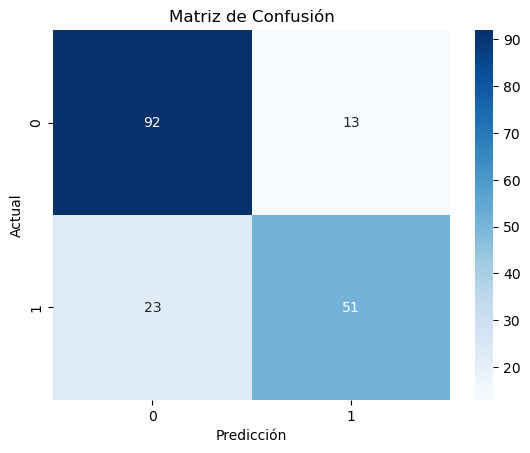

Precisión del Modelo: 0.7988826815642458


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = best_model.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del Modelo:', accuracy)

## Visualización de los Resultados del Modelo

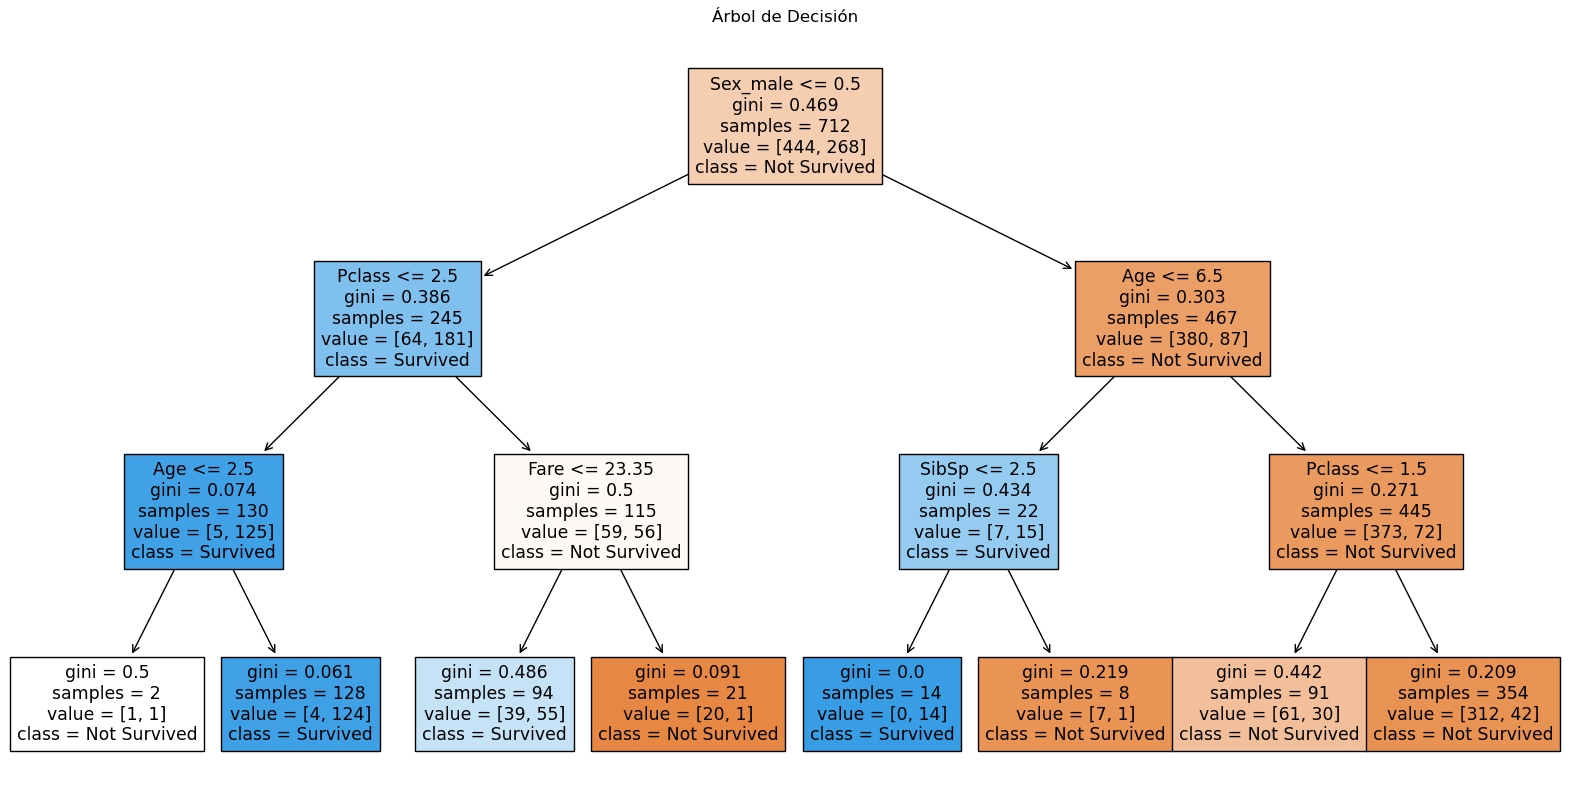

In [12]:
from sklearn.tree import plot_tree

# Convertir feature_names a una lista
feature_names = X.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=feature_names, class_names=['Not Survived', 'Survived'])
plt.title('Árbol de Decisión')
plt.show()